#### Задание 1.

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [2]:
# with intercept
X = zp.reshape((len(zp), 1))
X_int = np.hstack([np.ones((len(zp), 1)), X])
X_int

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [3]:
y = ks.reshape((len(ks), 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [4]:
B_int = np.linalg.inv(X_int.T @ X_int) @ X_int.T @ y
B_int

array([[444.17735732],
       [  2.62053888]])

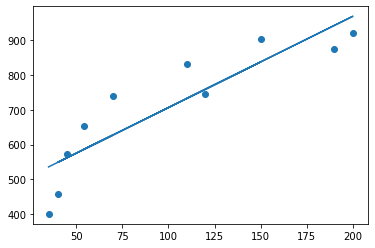

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp, ks)
plt.plot(zp, B_int[0, 0] + B_int[1, 0] * zp)
plt.show()

In [6]:
mse_int = ((ks - (B_int[0, 0] + B_int[1, 0] * zp))**2).sum()/len(ks)
mse_int

6470.414201176658

In [7]:
# whithout intercept
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
B = np.linalg.inv(X.T @ X) @ X.T @ y
B

array([[5.88982042]])

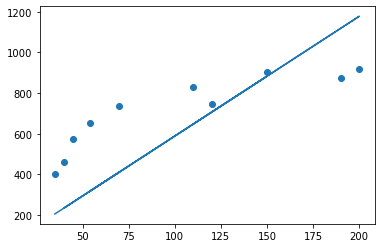

In [10]:
plt.scatter(zp, ks)
plt.plot(zp, B[0, 0] * zp)
plt.show()

In [11]:
mse = ((ks - (B[0, 0] * zp))**2).sum()/len(ks)
mse

56516.8584157194

In [12]:
mse/mse_int

8.734658502301397

Вывод - с интерсептом линейная регрессия намного точней описывает зависимость, метрика mse различается почти в 9 раз

#### Задание 2.

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
def mse_(B1, y=ks, X=zp, n=len(ks)):
    return np.sum((B1*X-y)**2)/n

In [26]:
alpha = 1e-6
B1 = 10
n = len(ks)

In [27]:
for i in range(1500):
    B1 -=alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%100 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration: 0, B1 = 9.8867514, mse = 276604.34287384455
Iteration: 100, B1 = 6.134338965197076, mse = 57340.5519462072
Iteration: 200, B1 = 5.904779227072703, mse = 56519.94114908718
Iteration: 300, B1 = 5.890735548696904, mse = 56516.86995307483
Iteration: 400, B1 = 5.889876404563293, mse = 56516.8584588988
Iteration: 500, B1 = 5.889823845068368, mse = 56516.85841588101
Iteration: 600, B1 = 5.88982062965852, mse = 56516.85841572002
Iteration: 700, B1 = 5.889820432950761, mse = 56516.85841571941
Iteration: 800, B1 = 5.8898204209168545, mse = 56516.85841571941
Iteration: 900, B1 = 5.889820420180661, mse = 56516.8584157194
Iteration: 1000, B1 = 5.8898204201356235, mse = 56516.85841571941
Iteration: 1100, B1 = 5.889820420132868, mse = 56516.8584157194
Iteration: 1200, B1 = 5.889820420132705, mse = 56516.8584157194
Iteration: 1300, B1 = 5.889820420132705, mse = 56516.8584157194
Iteration: 1400, B1 = 5.889820420132705, mse = 56516.8584157194


#### Задание 3.

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица значений функции Лапласа, как и z-таблица нормального распределения может использоваться для вычисления доверительных интервалов и проверки статистических гипотез, когда мы имеем нормально распределенную генеральную совокупность, и ее дисперсия известна.

Таблица критических точек распределения Стьюдента используется для генеральной совокупности с любым распределением, причем дисперсия этой совокупности неизвестна

#### Задание 4*.

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Чтобы найти коэффициенты линейной регрессии, нужно двигаться по направлению отрицательного градиента. То есть, для каждого коэффициента нужно найти частные производные:

$$mse=\frac{\sum{(\beta_{0}+\beta_{1}X-y)^2}}{n}$$

$$\frac{\partial{mse}}{\partial{\beta_{0}}}=2\frac{\sum{(\beta_{0}+\beta_{1}X-y)}}{n}$$

$$\frac{\partial{mse}}{\partial{\beta_{1}}}=2\frac{\sum{(\beta_{0}+\beta_{1}X-y)X}}{n}$$

In [36]:
def mse_2(B0, B1, y=ks, X=zp, n=len(ks)):
    return np.sum((B0+B1*X-y)**2)/n

In [65]:
alpha = 5e-5
B0 = 200
B1 = 5
n = len(ks)

In [66]:
for i in range(800000):
    B0 -= alpha*(2/n)*np.sum((B0+B1*zp-ks))
    B1 -= alpha*(2/n)*np.sum((B0+B1*zp-ks)*zp)
    if i%20000 == 0:
        print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_2(B0, B1)}')

Iteration: 0, B0 = 200.00029, B1 = 4.1978670594, mse = 22260.6553770785
Iteration: 20000, B0 = 297.16151019099004, B1 = 3.7026130685481675, mse = 11953.041146580606
Iteration: 40000, B0 = 355.6604347343225, B1 = 3.2720460419324366, mse = 8457.941068066775
Iteration: 60000, B0 = 390.8821123722811, B1 = 3.0128054980868813, mse = 7190.919733642474
Iteration: 80000, B0 = 412.0887684829097, B1 = 2.8567190924427557, mse = 6731.607260230079
Iteration: 100000, B0 = 424.85710586925154, B1 = 2.7627408679509298, mse = 6565.100238998214
Iteration: 120000, B0 = 432.54480725701603, B1 = 2.706157422120443, mse = 6504.739178229401
Iteration: 140000, B0 = 437.1735032915249, B1 = 2.6720890370305557, mse = 6482.857472399935
Iteration: 160000, B0 = 439.9603996470447, B1 = 2.6515767680162163, mse = 6474.925056304045
Iteration: 180000, B0 = 441.6383649397545, B1 = 2.6392265148707708, mse = 6472.0494475371315
Iteration: 200000, B0 = 442.6486527884416, B1 = 2.6317905382535773, mse = 6471.007000232258
Iteratio